In [ ]:
import sys
sys.path.append('D:/PythonProg/prak')

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import time
import distances
import nearest_neighbors as nn
import cross_validation as cv

In [ ]:
def time_proc(func, **kwargs):
    import time
    start_time = time.time()
    func(**kwargs)
    end_time = time.time()
    return (end_time - start_time)

# Загрузка выборки
Загружаем выборку, случайным образом выбираем подмножества 10, 20 и 100 признаков

In [ ]:
mnist = fetch_openml("mnist_784")
features = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
subset_sizes = [10, 20, 100]
feature_complects = []
n_features = features.shape[1]
for subset_size in subset_sizes:
    random_indices = np.random.choice(n_features, size=subset_size, replace=False)
    feature_complects.append(features[:, random_indices])

Для каждого подмножества признаков разделяем выборку на обучающую и тестовую

In [ ]:
X_train = []
X_test = []
for complect in feature_complects:
    X_train.append(complect[:60000])
    X_test.append(complect[60000:])
y_train, y_test = targets[:60000].astype(int), targets[60000:].astype(int)

In [ ]:
strategies = ['kd_tree', 'ball_tree', 'brute', 'my_own']
model_1 = nn.KNNClassifier(5, strategies[0], 'euclidean', False, 1000)
model_2 = nn.KNNClassifier(5, strategies[1], 'euclidean', False, 1000)
model_3 = nn.KNNClassifier(5, strategies[2], 'euclidean', False, 1000)
model_4 = nn.KNNClassifier(5, strategies[3], 'euclidean', False, 1000)
# model1.fit(X_train[1], y_train)

In [ ]:
time_processing = [[],[],[]]
for i in range(0, 3):
    model_1.fit(X_train[i], y_train)
    model_2.fit(X_train[i], y_train)
    model_3.fit(X_train[i], y_train)
    model_4.fit(X_train[i], y_train)
    time_processing[i].append(time_proc(model_1.find_kneighbors, X=X_test[i]))
    time_processing[i].append(time_proc(model_2.find_kneighbors, X=X_test[i]))
    time_processing[i].append(time_proc(model_3.find_kneighbors, X=X_test[i]))
    time_processing[i].append(time_proc(model_4.find_kneighbors, X=X_test[i]))
time_processing

[[2.650987148284912, 11.696975946426392, 22.168161392211914, 138.09228515625],
 [4.802529811859131,
  47.54438042640686,
  23.061520099639893,
  155.75479173660278],
 [233.0402626991272, 240.61133670806885, 28.31191086769104, 294.659138917923]]

In [ ]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

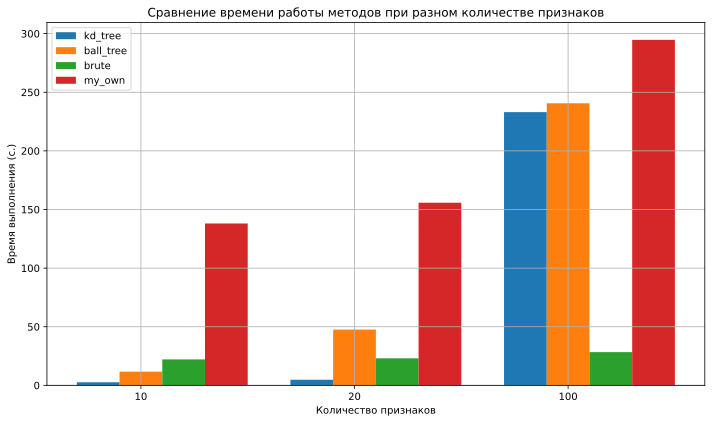

In [ ]:
import matplotlib.pyplot as plt
features_labels = ['10', '20', '100']
n_features = len(features_labels)
n_strategies = len(strategies)
bar_width = 0.2
index = np.arange(n_features)
plt.figure(figsize=(10, 6))
for i in range(n_strategies):
    plt.bar(index + i * bar_width, [time_processing[j][i] for j in range(n_features)], bar_width, label=strategies[i])
    # plt.yscale('log')
plt.xlabel('Количество признаков')
plt.ylabel('Время выполнения (c.)')
plt.title('Сравнение времени работы методов при разном количестве признаков')
plt.xticks(index + bar_width, features_labels)
plt.grid(True)
plt.legend()

# Отображение графика
plt.tight_layout()
plt.savefig('time-proc2.pdf')
plt.show()

In [ ]:
X_train, X_test = features[:60000], features[60000:]

In [ ]:
%time euclid_results = cv.knn_cross_val_score(X_train, y_train, list(range(1, 11)), 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='euclidean', weights=False)

CPU times: total: 10.9 s
Wall time: 4.37 s


In [ ]:
%time cosine_results = cv.knn_cross_val_score(X_train, y_train, list(range(1, 11)), 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='cosine', weights=False)

CPU times: total: 12 s
Wall time: 4.86 s


In [ ]:
plot1 = {}
for i in euclid_results.keys():
    plot1[i] = np.mean(euclid_results[i])
plot2 = {}
for i in euclid_results.keys():
    plot2[i] = np.mean(cosine_results[i])

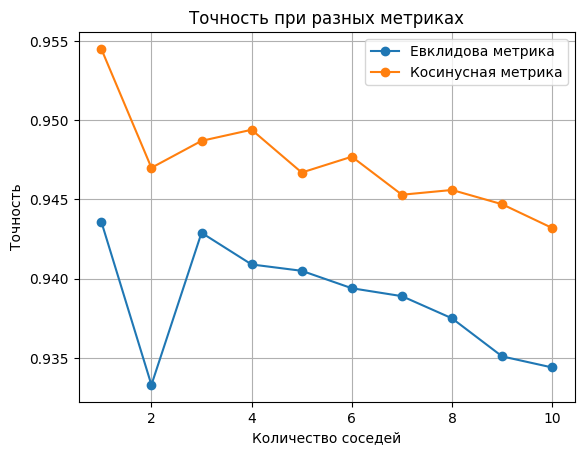

In [ ]:
plt.plot(plot1.keys(), plot1.values(), label='Евклидова метрика', marker='o')
plt.plot(plot2.keys(), plot2.values(), label='Косинусная метрика', marker='o')
plt.grid(True)
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.title('Точность при разных метриках')
plt.legend()
plt.savefig('metrics1.pdf')
plt.show()
# plt.savefig('metrics1.pdf')

In [ ]:
%time cosine_results1 = cv.knn_cross_val_score(X_train, y_train, list(range(1, 11)), 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='cosine', weights=False)

CPU times: total: 10 s
Wall time: 4.21 s


In [ ]:
%time cosine_results2 = cv.knn_cross_val_score(X_train, y_train, list(range(1, 11)), 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='cosine', weights=True)

CPU times: total: 9.95 s
Wall time: 4.22 s


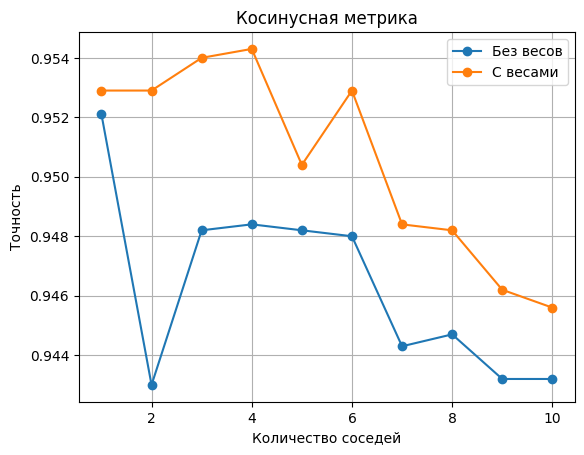

In [ ]:
plot1 = {}
for i in cosine_results1.keys():
    plot1[i] = np.mean(cosine_results1[i])
plot2 = {}
for i in cosine_results2.keys():
    plot2[i] = np.mean(cosine_results2[i])
plt.plot(plot1.keys(), plot1.values(), label='Без весов', marker='o')
plt.plot(plot2.keys(), plot2.values(), label='С весами', marker='o')
plt.grid(True)
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.title('Косинусная метрика')
plt.legend()
plt.savefig('cos_weights.pdf')
plt.show()

In [ ]:
%time euclid_results1 = cv.knn_cross_val_score(X_train, y_train, list(range(1, 11)), 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='euclidean', weights=False)
%time euclid_results2 = cv.knn_cross_val_score(X_train, y_train, list(range(1, 11)), 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='euclidean', weights=True)

CPU times: total: 10.7 s
Wall time: 4.16 s
CPU times: total: 10.7 s
Wall time: 4.24 s


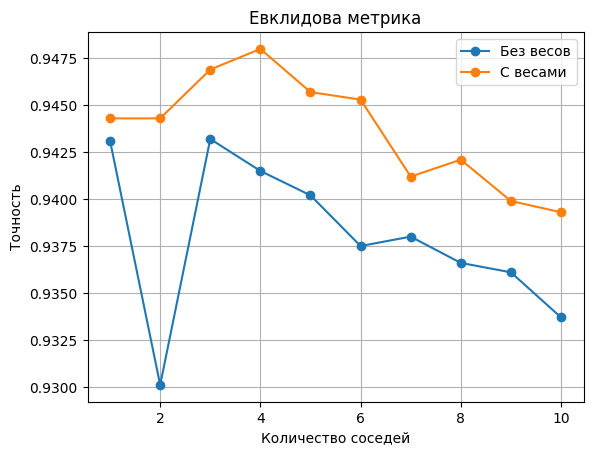

In [ ]:
plot1 = {}
for i in euclid_results1.keys():
    plot1[i] = np.mean(euclid_results1[i])
plot2 = {}
for i in euclid_results2.keys():
    plot2[i] = np.mean(euclid_results2[i])
plt.plot(plot1.keys(), plot1.values(), label='Без весов', marker='o')
plt.plot(plot2.keys(), plot2.values(), label='С весами', marker='o')
plt.grid(True)
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.title('Евклидова метрика')
plt.legend()
plt.savefig('evc_weights.pdf')
plt.show()

In [ ]:
model = nn.KNNClassifier(4, 'brute', 'cosine', True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
np.mean(y_test == y_pred)

0.9752

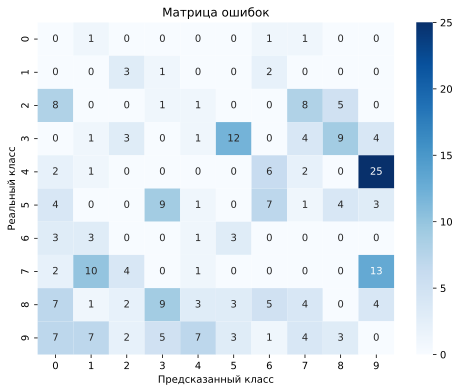

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
cm_no_diag = np.copy(conf_matrix)
np.fill_diagonal(cm_no_diag, 0)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_diag, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
# plt.xticks(np.arange(0, conf_matrix.shape[1], step=1))
# plt.yticks(np.arange(0, conf_matrix.shape[0], step=1))
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.savefig('conf_matrix1.pdf')
plt.show()
# plt.savefig('conf_matrix1.pdf')

Точность по кросс валидации с включ весами и косинусной метрикой

In [ ]:
np.mean(cosine_results2[4])

0.9550003590641007

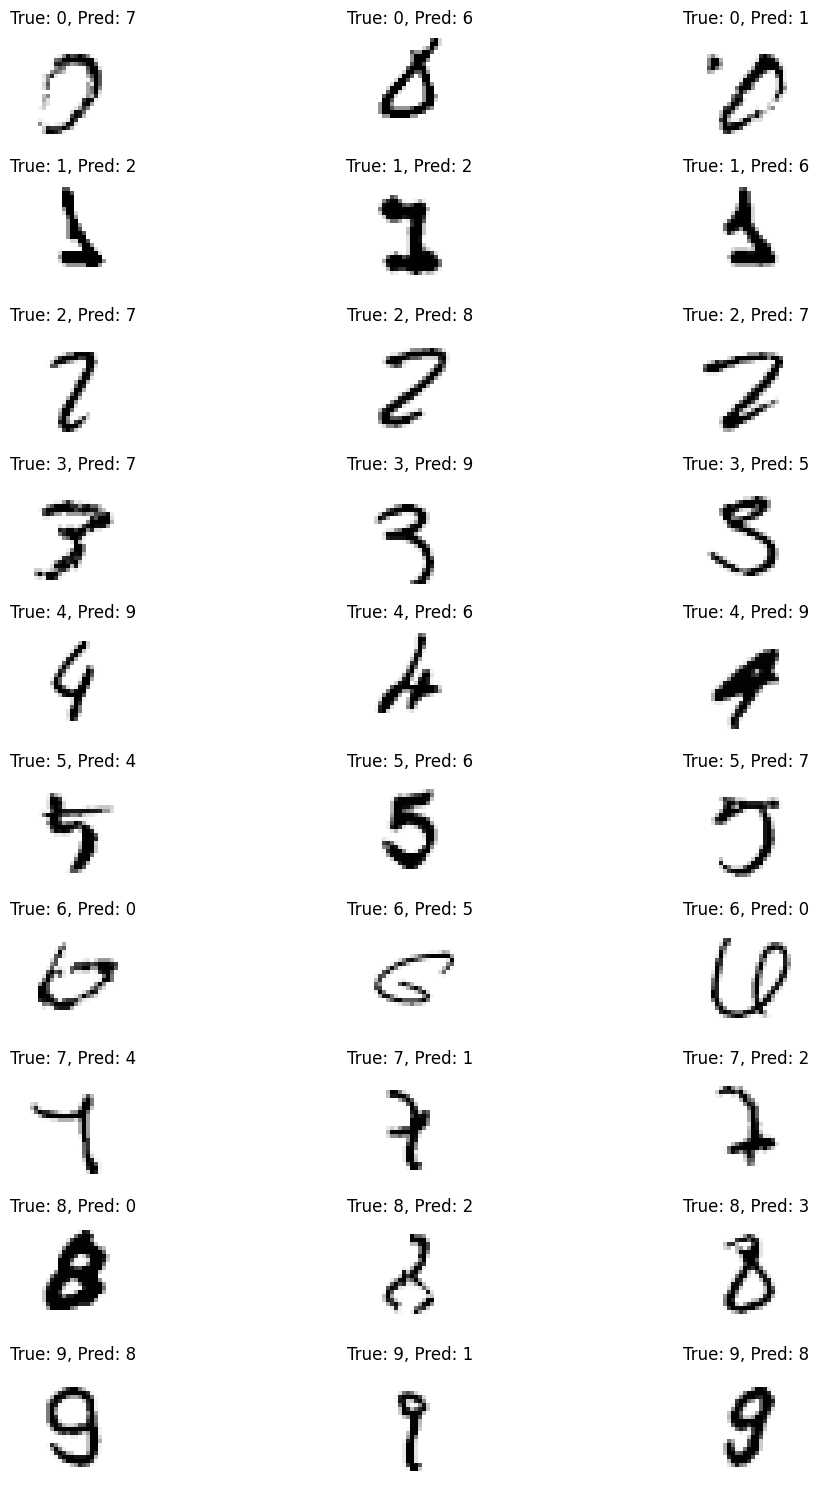

In [ ]:
incorrect_indices = np.where(y_test != y_pred)[0]
errors_per_class = {i: [] for i in range(10)}
for idx in incorrect_indices:
    true_label = y_test[idx]
    errors_per_class[true_label].append(idx)

# Визуализируем по 3 ошибки для каждого класса
plt.figure(figsize=(12, 15))

for class_label, indices in errors_per_class.items():
    for i, idx in enumerate(indices[:3]):
        plt.subplot(10, 3, class_label * 3 + i + 1)
        image = X_test[idx].reshape(28, 28)  # Преобразуем из вектора в 2D изображение
        plt.imshow(image, cmap='Grays')
        plt.title(f'True: {y_test[idx]}, Pred: {int(y_pred[idx])}')
        plt.axis('off')

plt.tight_layout()
plt.savefig('err_exmpls.pdf')
plt.show()

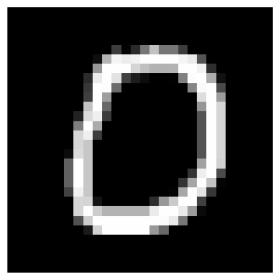

In [ ]:
error_indices = np.where(np.array(y_test) != np.array(y_pred))[0]
image = X_test[10].reshape(28, 28)
plt.imshow(image, cmap='gray')  # Отображаем объект
plt.axis("off")  # Отключаем оси для красоты
plt.show()

In [ ]:
import cv2

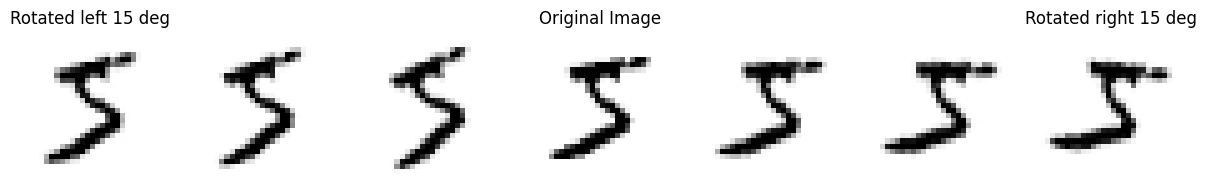

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def augment_with_rotation(image, angle):
    image = image.astype(np.uint8)
    pil_image = Image.fromarray(image)
    rotated_image = pil_image.rotate(angle, resample=Image.BICUBIC, fillcolor=0)
    rotated_image_np = np.array(rotated_image)

    return rotated_image_np

plt.figure(figsize=(15, 3))
i = X_train[0].reshape(28, 28)

augmented_img5 = augment_with_rotation(i, angle=5)
augmented_img10 = augment_with_rotation(i, angle=10)
augmented_img15 = augment_with_rotation(i, angle=15)
augmented_img_5 = augment_with_rotation(i, angle=-5)
augmented_img_10 = augment_with_rotation(i, angle=-10)
augmented_img_15 = augment_with_rotation(i, angle=-15)

plt.subplot(1, 7, 4)
plt.title("Original Image")
plt.imshow(i, cmap='Grays')
plt.axis('off')

plt.subplot(1, 7, 1)
plt.title("Rotated left 15 deg")
plt.imshow(augmented_img5, cmap='Grays')
plt.axis('off')

plt.subplot(1, 7, 2)
plt.imshow(augmented_img10, cmap='Grays')
plt.axis('off')

plt.subplot(1, 7, 3)
plt.imshow(augmented_img15, cmap='Grays')
plt.axis('off')

plt.subplot(1, 7, 5)
plt.imshow(augmented_img_5, cmap='Grays')
plt.axis('off')

plt.subplot(1, 7, 6)
plt.imshow(augmented_img_10, cmap='Grays')
plt.axis('off')

plt.subplot(1, 7, 7)
plt.title("Rotated right 15 deg")
plt.imshow(augmented_img_15, cmap='Grays')
plt.axis('off')
plt.savefig('rotated_img.pdf')
plt.show()

In [ ]:
def augment_with_shift(image, shift_x, shift_y):
    width, height = image.size
    translate = (shift_x, shift_y)
    augmented_image = image.transform(
        (width, height),
        Image.AFFINE,
        (1, 0, translate[0], 0, 1, translate[1]),
        fillcolor=0
    )
    return augmented_image

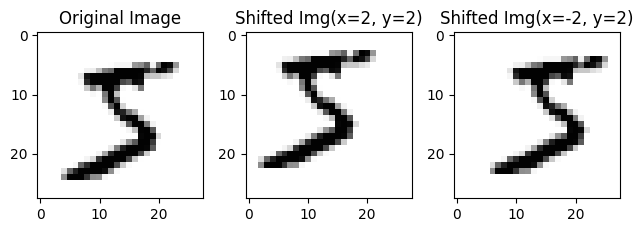

In [ ]:
i = X_train[0].reshape(28, 28)
original_image = Image.fromarray(i.astype(np.uint8))

augmented_img1 = augment_with_shift(original_image, shift_x=2, shift_y=2)
augmented_img2= augment_with_shift(original_image, shift_x=-2, shift_y=1)

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='Grays')


plt.subplot(1, 3, 2)
plt.title("Shifted Img(x=2, y=2)")
plt.imshow(augmented_img1, cmap='Grays')

plt.subplot(1, 3, 3)
plt.title("Shifted Img(x=-2, y=2)")
plt.imshow(augmented_img2, cmap='Grays')

plt.tight_layout()
plt.savefig('shifted_img.pdf')
plt.show()

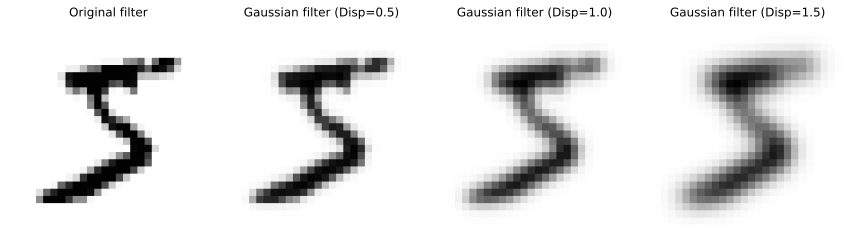

In [ ]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

def augment_with_gaussian_blur(image, sigma):
    augmented_image = image.filter(ImageFilter.GaussianBlur(sigma))
    return augmented_image


X_train_aug = []
i = X_train[0].reshape(28, 28)
original_image = Image.fromarray(i.astype(np.uint8))
augmented_img_05 = augment_with_gaussian_blur(original_image, sigma=0.5)
augmented_img_1 = augment_with_gaussian_blur(original_image, sigma=1)
augmented_img_15 = augment_with_gaussian_blur(original_image, sigma=1.5)
X_train_aug.append(np.array(augmented_img_05))
X_train_aug.append(np.array(augmented_img_1))
X_train_aug.append(np.array(augmented_img_15))
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Original filter")
plt.imshow(original_image, cmap='Grays')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Gaussian filter (Disp=0.5)")
plt.imshow(augmented_img_05, cmap='Grays')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Gaussian filter (Disp=1.0)")
plt.imshow(augmented_img_1, cmap='Grays')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Gaussian filter (Disp=1.5)")
plt.imshow(augmented_img_15, cmap='Grays')
plt.axis('off')

plt.tight_layout()
plt.savefig('gauss_img.pdf')
plt.show()


In [ ]:
import cv2
import numpy as np
original_image = X_train[0].reshape(28, 28)
img = original_image.astype(np.uint8)
kernel = np.ones((2,2), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.title("Original image")
plt.imshow(original_image, cmap='Grays')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Errosion")
plt.imshow(erosion, cmap='Grays')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Dilation")
plt.imshow(erosion, cmap='Grays')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Openning")
plt.imshow(opening, cmap='Grays')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Closing")
plt.imshow(closing, cmap='Grays')
plt.axis('off')

plt.tight_layout()
plt.savefig('morph_img.pdf')
plt.show()

AttributeError: module 'cross_validation' has no attribute 'MORPH_OPEN'

In [ ]:
def augment_image(image, rotation_angle=0, shift_x=0, shift_y=0, blur_radius=0):
    rotated_image = image.rotate(rotation_angle)
    shifted_image = rotated_image.transform(rotated_image.size, Image.AFFINE, (1, 0, shift_x, 0, 1, shift_y))
    blurred_image = shifted_image.filter(ImageFilter.GaussianBlur(blur_radius))

    return np.array(blurred_image)

In [ ]:
def morph_operations(image, erosion=False, dilation=False, opening=False, closing=False):
    original_image = image.reshape(28, 28)
    img = original_image.astype(np.uint8)
    kernel = np.ones((2, 2), np.uint8)
    if erosion:
        erosion = cv2.erode(img, kernel, iterations=1)
        return erosion
    if dilation:
        dilation = cv2.dilate(img, kernel, iterations=1)
        return dilation
    if opening:
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        return opening
    if closing:
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        return closing

In [ ]:
X_train_aug = []
kernel = np.ones((2,2), np.uint8)
for img in X_train:
    img = img.astype(np.uint8)
    img_pil = Image.fromarray(img.reshape(28, 28))
    augmented_img = augment_image(img_pil, 5, 2, 2, 1)
    X_train_aug.append(augmented_img.astype(int))
X_train_aug = np.array(X_train_aug, dtype=np.int64)
num_samples = X_train_aug.shape[0]
X_train_aug = X_train_aug.reshape(num_samples, -1)

In [ ]:
np.mean(cvalid.knn_cross_val_score(X_train_aug, y_train, [4], 'accuracy', cv=cv.kfold(len(y_test), 3), strategy='brute', metric='cosine', weights=True)[4])

NameError: name 'cvalid' is not defined

In [ ]:
X_train_aug1 = []
for img in X_train:
    augmented_img = morph_operations(img, dilation=True)
    X_train_aug1.append(augmented_img)
X_train_aug1 = np.array(X_train_aug1, dtype=np.int64)
num_samples = X_train_aug1.shape[0]
X_train_aug1 = X_train_aug1.reshape(num_samples, -1)

In [ ]:
np.mean(cvalid.knn_cross_val_score(X_train_aug1, y_train, [4], 'accuracy', cv=cvalid.kfold(len(y_test), 3), strategy='brute', metric='cosine', weights=True)[4])

In [ ]:
X_train_aug2 = []
for img in X_train_aug:
    augmented_img = morph_operations(img, opening=True)
    X_train_aug2.append(augmented_img)
X_train_aug2 = np.array(X_train_aug2, dtype=np.int64)
num_samples = X_train_aug2.shape[0]
X_train_aug2 = X_train_aug2.reshape(num_samples, -1)

In [ ]:
X_train_aug4 = []
kernel = np.ones((2,2), np.uint8)
for img in X_train:
    img = img.astype(np.uint8)
    img_pil = Image.fromarray(img.reshape(28, 28))
    augmented_img = augment_image(img_pil, -5, 1, 2, 1)
    X_train_aug4.append(augmented_img.astype(int))
X_train_aug4 = np.array(X_train_aug, dtype=np.int64)
num_samples = X_train_aug4.shape[0]
X_train_aug4 = X_train_aug4.reshape(num_samples, -1)

In [ ]:
X_train_aug3 = []
for img in X_train:
    augmented_img = morph_operations(img, closing=True)
    X_train_aug3.append(augmented_img)
X_train_aug3 = np.array(X_train_aug3, dtype=np.int64)
num_samples = X_train_aug3.shape[0]
X_train_aug3 = X_train_aug3.reshape(num_samples, -1)

In [ ]:
combined_x = np.vstack(( X_train_aug1, X_train, X_train_aug2, X_train_aug4, X_train_aug3))
combined_y = np.hstack((y_train, y_train, y_train, y_train, y_train))

-5, 1, -1, 1 0.9637998292930673

5, 1, 2, 1 0.9632003392300837

5, 2, 2, 1 0.9641000092810721

In [ ]:
np.mean(cvalid.knn_cross_val_score(combined_x, combined_y, [4], 'accuracy', cv=cvalid.kfold(len(y_test), 3), strategy='brute', metric='cosine', weights=True)[4])

0.9542004590381054

0.9641000692750739 при повороте по часовой на 5 сдвиг вправо 2 вверх 1 гаусс 1 + открытие

0.9263998985381442 эрозия \
0.9551003090710991 диляция \
0.9503004589601133 открытие

0.9522998790580918 закрытие


In [ ]:
model = nn.KNNClassifier(4, 'brute', 'cosine', True)
model.fit(combined_x, combined_y)
y_pred = model.predict(X_test)
np.mean(y_test == y_pred)

0.9788

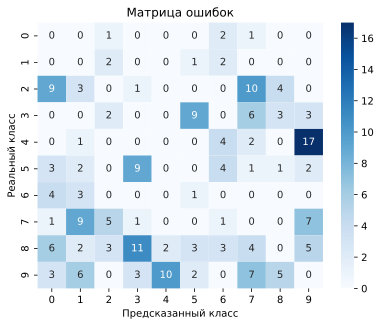

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
cm_no_diag = np.copy(conf_matrix)
np.fill_diagonal(cm_no_diag, 0)
sns.heatmap(cm_no_diag, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.savefig('conf_matrix5.pdf')
plt.show()
# plt.savefig('conf_matrix1.pdf')

<Axes: >

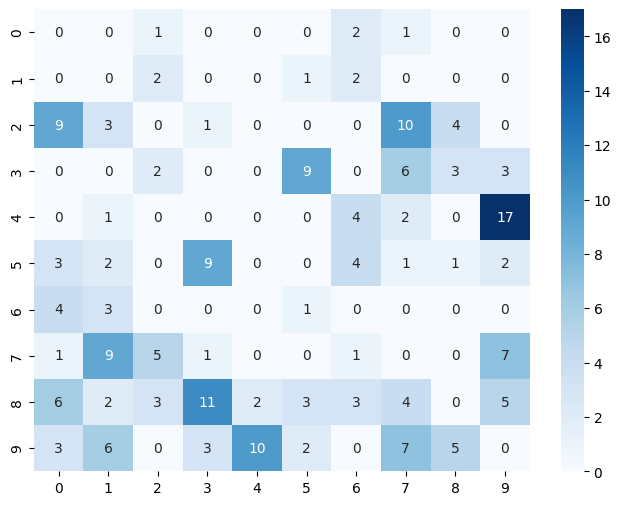

In [ ]:
import seaborn as sns
cm_no_diag = np.copy(conf_matrix)
np.fill_diagonal(cm_no_diag, 0)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_diag, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])


In [ ]:
X_test_aug = []
kernel = np.ones((2,2), np.uint8)
for img in X_test:
    img = img.astype(np.uint8)
    img_pil = Image.fromarray(img.reshape(28, 28))
    augmented_img = augment_image(img_pil, 5, 2, 2, 1)
    X_test_aug.append(augmented_img.astype(int))
X_test_aug = np.array(X_test_aug, dtype=np.int64)
num_samples = X_test_aug.shape[0]
X_test_aug = X_test_aug.reshape(num_samples, -1)

X_test_aug1 = []
for img in X_test:
    augmented_img = morph_operations(img, dilation=True)
    X_test_aug1.append(augmented_img)
X_test_aug1 = np.array(X_test_aug1, dtype=np.int64)
num_samples = X_test_aug1.shape[0]
X_test_aug1 = X_test_aug1.reshape(num_samples, -1)

X_test_aug2 = []
for img in X_test_aug:
    augmented_img = morph_operations(img, opening=True)
    X_test_aug2.append(augmented_img)
X_test_aug2 = np.array(X_test_aug1, dtype=np.int64)
num_samples = X_test_aug2.shape[0]
X_test_aug2 = X_test_aug2.reshape(num_samples, -1)

combined_x = np.vstack(( X_test_aug1, X_test, X_test_aug2))
combined_y = np.hstack((y_test, y_test, y_test))

In [ ]:
combined_x.shape

(30000, 784)

In [ ]:
model = nn.KNNClassifier(4, 'brute', 'cosine', True)
model.fit(X_train, y_train)
y_pred = model.predict(combined_x)
np.mean(combined_y == y_pred)

0.9576

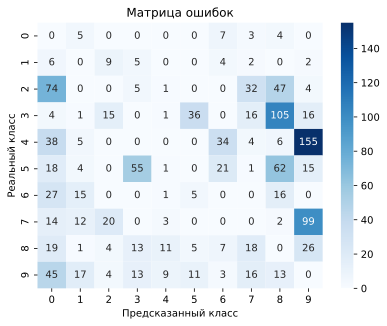

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(combined_y, y_pred)
cm_no_diag = np.copy(conf_matrix)
np.fill_diagonal(cm_no_diag, 0)
sns.heatmap(cm_no_diag, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Реальный класс')
plt.savefig('conf_matrix111.pdf')
plt.show()
# plt.savefig('conf_matrix1.pdf')